<img style="float: left; padding-right: 10px; width: 45px" src="images/ExtensionFlag.jpg" alt="ExtensionFlag.jpg"/>

# CSCI-e89: Deep Learning, Fall 2024

## Lab 04- Convolutional Neural Networks (CNN)
**Harvard University Extension School - Prof. Zoran B. Djordjević**<br/>
**Joan Imrich  28-Sept-2024**<br/>
<hr style="height:2pt">

#### <font color="#9F0808">Part 1: CNN Core Concepts</font>
* **Demo - How does CNN classify & predict images?**
* <i>Image recognition using CIFAR-10 data, Compare Sequential vs. DenseNet121 models, SGD Optimizer</i>

#### Part 2: SOTA CNNs & Hybrid Models
* **Demo - DenseNet CNN**
* <i> Confusion Matrix, Data Aumentation, Validation </i>

## Table Of Contents: 

* [Lab-4 Overview CNNs](#lab4-cnn)
    * [Explaining Model](#cnn-model)
    * [Core Concepts Table1](#table1)
    * [Predictions](#predict)
    * [Summary Table2](#table2)
* [Demo- CNN (CIFAR-10 / Keras-Sequential)](#demo)


## <font color="#9F0808"> Why the Convolutions in Convolutional Neural Networks (CNNs)?</font><a class="lab4-cnn" id="lab4-cnn"></a>
                                                                                               
**CNNs, also known as a ConvNet**, are designed specifically for processing spatial or grid-like data such as images. 
<img style="float: right; padding-right: 10px; height: 200px;" src="images/cnnformula.jpg" alt="cnnformula.jpg"/>

In the case of CNN, convolution is applied to the input data to filter the information and produce a feature map. Ultimately, the convolutional layer converts the image into numerical values, allowing the neural network to interpret and extract relevant patterns. CNN architectures can vary based on specific use problem and framework (computational formula on right).

## Explainable AI Use Case Implementation:

#### Imagine building a NN to answer the question: What is the object in picture? (bird, plane, manta ray)
<hr/>

## <font color="#9F0808"> Here’s how a CNN recognizes a bird: </font><a class="cnn-model" id="cnn-model"></a>

### Image pixels (arrays) are fed to convolutional layers that performs the convolution operation, it results in a convolved map 

<img style="float: right; padding-right: 10px; height: 250px;" src="images/bird_cnn.jpg" alt="Fig1-bird_cnn.jpg"/>

1. **Input layer** uses a set of learnable filters that slide across the input image. 
2. At each position, the filter performs an element-wise multiplication with the corresponding patch of the input and sums the results.
3. The **Output of this operation** for each filter becomes a separate feature map, highlighting specific features or patterns in the input

Images used for Computer Vision problems are often 224x224 or larger. Imagine building a neural network to process 224x224 color images: including the 3 color channels (RGB) in the image, that comes out to 224 x 224 x 3 = 150,528 input features! A typical hidden layer in such a network might have 1024 nodes, so we’d have to train 150,528 x 1024 = 150+ million weights for the first layer alone, resulting in a huge NN nearly impossible to train.

It’s not like we need that many weights, either. The nice thing about images is that we know pixels are most useful **in the context of their neighbors**. Objects in images are made up of small, localized features, like the type of bird beak, wing patterns in airplanes, or bird tail feathers. It would be wasteful for every node in the first hidden layer to look at every pixel. 
<img style="float: left; padding-right: 10px; height: 250px;" src="images/bird_cnn_.jpg" alt="Fig2-bird_cnn_.jpg"/>

Slide the filter matrix over the image, **compute the dot product** to get the convolved feature matrix (details below).
**Contours and edges of an image affect our perception!** <font color="#9F0808"> Just like binocular input from both eyes is crucial for stereoscopic vision, NN inputs need to share similar **receptive field tuning properties**, including orientation, spatial frequency, and linearity!</font>
The convolved map is applied to a **ReLU actvation function** to learn non-linear relationships. 
The image is processed with multiple convolutions and ReLU layers for locating feature maps
Different pooling layers with various filters are used to identify specific parts of the image. 
The **pooled feature map is flattened** and fed to a fully connected layer to get the final output<br/>

<hr/>

## <font color="#9F0808"> Core  Concepts Table 1: </font><a class="table1" id="table1"></a>

<br/>

<table>
  <tr>
    <th text-align: center;> CNN Architecture:</th>
    <th text-align: center;> Building Blocks:</th> 
  </tr>
  <tr>
      <td> <b>CNN consists of Layers: Convolutional, Pooling, Fully Connected.</b> Images are fed to NN <b>Input layer</b> in the form of arrays, 2D/3D matrix pixel values. 
    </td> 
    <td><b>Input</b> to a convolutional layer is typically a tensor with the shape: <b>(number of inputs) × (Weight) × (Width) × (Depth - 3 RGB color channels)</b>) Convolutional Layers: apply <b> filters (kernels)</b> to extract features from images.
    </td>
  </tr>
  <tr>
          <td><b>Local Connectivity enables Automatic Feature Learning in CNNs!</b> CNNs do not look at every pixel in every node of the first hidden layer. Each neuron in the first hidden layer is connected to only a small region of the input image, rather than all pixels. (receptive field). <b>Activation functions (like ReLU)</b> are applied after convolutional layers to introduce non-linearity into the model.
    </td> 
    <td><b>Convolution</b> operation <b>extracts features</b> from an input image by taking the <b>dot product computations </b> between the input data and (2D/3D) array of weights. <b>Kernels or Filters </b>, are small matrices that slide over the input data to perform convolution operations. This process extracts specific features such as edges, textures, or patterns from the input images. 
    </td>

  </tr>
  <tr>
    <td><b>Training</b> Fully Connected layers connect every neuron from the previous layer to every neuron in the current layer, enabling the model to make final predictions based on the learned features.
    </td>
      <td><b>Pooling Layers reduce the spatial dimensions</b>(e.g., using MaxPooling) while retaining important features. <b>Hyperparameters</b> can be adjusted for Activation, Loss function, Optimizer, Iterating through epochs, Forward and backward passes, Updating weights
    </td> 
  </tr>
  <tr>
    <td>
        <b>Output Evaluation</b> Predictions usually includes metrics like accuracy and loss on a validation set. Many Real-World Use Cases: Medical/ Diagnostic, Transpotation, Financial, Device Coupling ...
        <ul> <li>Image Classification: Identify objects within images (e.g. birds vs. cats)</li>
        <li>Object Detection: Locate, classify multiple objects within an image.</li>
        <li>Semantic Segmentation: Classify each pixel/word into categories.</li>
        <li>Facial Recognition: Identify individuals based on features.</li>
    </ul>
    </td>
    <td> <b>Classification Metrics: </b> Accuracy, Precision/Recall, F1 Score, Confusion Matrix, Area Under the ROC Curve (AUC-ROC)<br/>
   <b>Regression: </b> Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE)<br/>
   <b>Image Segmentation: </b> Intersection over Union (IoU), Dice Coefficient<br/>
   <b>Object Detection: </b> Mean Average Precision (mAP), <b>K-fold cross-validation</b> estimate how well CNN model is expected to perform on unseen data
    </td> 
  </tr>
</table>
<hr/>

## <font color="#9F0808"> Predictions  </font><a class="table1" id="predict"></a>
### <font color="#9F0808"> CNNs are primarily feed-forward neural networks; they use backward propagation only during Training process.</font> 
Meaning that during inference (when making predictions), information flows in one direction from the input layer through hidden layers to the output layer. This architecture allows CNNs to efficiently process spatial data, such as images, by applying convolutional filters and pooling layers to capture important features. Unlike Recurrent Neural Networks (RNNs), **CNNs do not have feedback connections that allow information to flow backwards during inference**. <font color="#9F0808">CNN Training method uses backward propagation to optimize weights and improve performance </font> (e.g. error computations, predicted vs. actual calculations)

**Network starts with convolutional layers to extract features, uses max pooling to reduce spatial dimensions, and ends with fully connected layers for classification.**

<img style="float: left; padding-right: 10px; width: 700px;" src="images/cnn-structure.jpg" alt="cnn-structure.jpg"/>

**Starting with 32x32 (2D CIFAR input image size =1,024 total pixel )** First max pooling reduces it to 16x16, Second max pooling reduces it to 8x8 feature maps before the fully connected layers.

**1. First layer in a CNN is typically a convolutional layer**, which applies **"Filters" (e.g. ""kernel", a small matrix of learnable parameters)**  moves across the input image or a feature map from a previous layer. Each **filter slides both horizontally and vertically** performing convolution operations to compute the dot product or convolved feature matrix.

<img style="float: right; padding-right: 10px; width: 500px" src="images/cnn-slide-matrix.jpg" alt="cnn-slide-matrix.jpg"/>

This process creates **feature maps (e.g. also called activation maps)** that highlight specific patterns or features in different areas of the image. **Hidden layers** carry out feature extraction by performing different calculations and manipulations. 

**2.** There are multiple hidden layers like the **Convolution layer, the ReLU "Activation" layer, and Pooling layer**, that perform feature extraction from the image. **ReLU stands for the "Rectified Linear Unit.** Once the feature maps are extracted, the next step is to move them to a **ReLU layer.** ReLU performs an element-wise operation and **sets all the negative pixels to 0.**

**3.** Finally, a **fully connected layer** identifies the object in the image. The final layer often uses **softmax activation** for multi-class classification or **sigmoid** for binary classification.


**Stride** refers to the number of pixels by which the convolutional filter shifts at each step when scanning the input.

**A stride of 1 moves the filter one pixel at a time**, Larger strides result in even smaller feature maps, as the filter covers more area with each step (large stride = small spatial dimensions of feature maps). It's generally recommended to **keep stride smaller than or equal to the kernel size** to avoid skipping over pixels entirely. 

### Why Normalize? 

**Normalization ensures that all features are on a similar scale**
<img style="float: left; padding-right: 10px; width: 225px" src="images/Hummingbird.jpg" alt="Hummingbird.jpg"/>
<img style="float: left; padding-right: 10px;" src="images/rgb.jpg" alt="rgb.jpg"/>

This prevents features with larger magnitudes from dominating the learning process unfairly. It allows the network to treat all features equally during training, potentially leading to more balanced learning.

When feeding images into NNs, **RGB values (255 each color channel) are Normalized.**
- Pixel values are typically **Normalized to a range of 0-1 or -1 to 1** to improve training stability.
- This is done by dividing all Pixel values by 255. For example, RGB (127, 127, 127) would become (0.5, 0.5, 0.5) after normalization, representing a medium gray. 
- 0 represents black (no intensity or  RGB (0, 0, 0)
- 1 represents full intensity

## <font color="#9F0808">It's All About improving gradient flow through the network! </font>
### Optimization, preventing vanishing or exploding gradients
#### **ReLU** introduces non-linearity to the network feature maps (helps mitigate the vanishing gradient problem)

* **ReLU operates on a very simple principle:**
For any positive input, it returns that input value unchanged.<br/>
For any negative input, it returns zero.

* **ReLU effectively "decides" which neurons to activate:**
Neurons with positive outputs remain active and pass on information.<br/>
Neurons with negative outputs are turned off and don't contribute to the network's decision.

### Why is Softmax useful? Softmax turns arbitrary real values into probabilities
A common design for this neural network would have it output 2 real numbers, one representing bird and the other cat, and apply Softmax on these values. For example, let’s say the network outputs [−1,2]
Cat Raw Score: -1, Probability: 0.368, Exponential Score (ex): 0.047
Bird Raw Score: 2, Probability: 0.953

<b>Softmax derives probabilities from raw scores,</b>, which normalizes the logits into a range between 0 and 1, ensuring that the sum of probabilities for all classes equals 1. In this case, the bird has a probability of 0.953, indicating a strong confidence in this classification, while the cat has a probability of 0.368.
This means our network is 95.3% confident that the picture is of a bird. Softmax lets us answer **classification questions with probabilities**, which are more useful than simpler binary answers (e.g. yes/no e.g. bird/plane using Activation('sigmoid'))
<br/>
<hr/>

## <font color="#9F0808"> CNN Summary Table 2: </font><a class="table2" id="table2"></a>

<table>
  <tr>
    <th text-align: center;> CNN Advantages </th>
    <th text-align: center;> Key Features</th>
    <th text-align: center;> CNN Building Blocks:</th> 
  </tr>
  <tr>
    <td><b> <font color="#9F0808">CNNs are primarily designed to process array data, with a focus on image classification.</font></b> <br/><br/> <b>CNNs enable pattern recognition tasks</b> in image processing of <b><font color="#9F0808">Multi-dimensional data</font></b> with spatial relationships, grid-like topology, or data organized in a grid format.
    </td> 
    <td>CNNs identify and classify objects within images by using layers that apply convolutional filters to extract features from input data. They can be adapted to work with different types of Large datasets organized in a grid format like <b>2D</b> CIFAR-10, MNIST, X-rays, Mammograms, or <b>3D</b> volumetric data, CT, MRI, PET scans  
    </td>  
    <td><b>Input to a convolutional layer is typically a <font color="#9F0808">tensor with the shape: (Height) × (Width) x (Depth - RGB color channels)</font></b>, based on data type, format, <b>1D-2D or 3D arrays of pixels.</b>
    <ul><li><b>A Filter (Kernal),</b> is a smaller matrix (e.g., 3x3 or 5x5) that slides across the input image. Each filter is designed to detect specific features such as edges or textures.</li>
    <li> <b>Dot Product Calculation:</b> As the filter moves across the image, it computes the dot product between its weights and the corresponding pixel values in the input. This operation results in a single value for each position of the filter, which forms part of the output feature map</li></ul></td>
  </tr> 
  <tr>
    <td><b>CNNs have transitioned from traditional image processing to becoming a powerful tool in NLP.</b>  <br/> <br/>
        <b>Hybrid CNN Models</b> combine the strengths of <font color="#9F0808"><b>Transfomer</b></font> and/or <font color="#9F0808"><b>NLP</b></font> models for <b>Object Detection </b>(video, mobile, audio spectrograms, smell + eNose devices)
    </td>
    <td><b>Convolutional layer is where the primary computation occurs</b> <br/><br/>
       <b> Convolution</b> operation extracts features from an input image by taking the <b> dot product between the input data and a 3D array of weights (the filter).</b>
    </td>    
    <td><b>Convolutional layers</b> apply filters to extract features. <b>ALL CNNS have  Convolutional Layers, Pooling Layers, Fully Connected Layers</b> 
        <ul>
        <li><b><font color="#9F0808">Hybrid CNN models</font></b> use Object Recognition Components below (depends on specific architecture), CNN Hidden Markov Chains (HMCs) in Drug Discovery (genomics), Speech recognition, <font color="#9F0808">Recurrent neural networks (RNNs)</font> for improved object classification accuracy based on extracted features.</li> 
        <li><b>Attention Mechanisms: </b>to find important features in cluttered scenes, useful in object detection in noisy scenarios (variable lighting, Autonomous Driving, Video Surveillance, Precise identification of tumors or abnormalities in medical scans)</li>
       <li><b>Combine Feature Extraction Networks: </b>like <font color="#9F0808">ResNet or EfficientNet </font>to improve the quality of features extracted from images before they are processed by subsequent layers</li>
       <li><b> Final Output Layer: </b> Object detection, using bounding box coordinates and class probabilities are predicted simultaneously during the detection process, enable model to output localization and identification results.
        </li>
        </ul> 
      </td>    
  </tr>
  <tr>
      <td>CNNs learn <b>hierarchical data representations</b>, making them particularly effective for tasks such as image classification and object detection (Animal > Bird > feather, beak)<br/><br/>   
        <b>Hybrid CNN Models</b> ability to capture local features and context makes them suitable for various NLP tasks, including text classification, sentiment analysis, and language modeling.
     </td>
     <td>CNNs are typically trained on labeled datasets, making them effective for supervised learning tasks such as image recognition, NLP, and medical imaging, etc.<br/><br/>  <b>Training</b> typically involves:
       <ul><li>Defining loss function, <b>Optimizer</b></li>
           <li>Iterating through <b>epochs</b></li>
           <li>Forward and backward passes</li>
           <li>Updating <b>weights</b>
           </li>
         </ul> 
      </td>         
      <td><b>Activation functions</b> (ReLU, sigmoid, tanh), <b>Optimizers</b> (ADAM (Adaptive Moment Estimation), SGD (Stochastic Gradient Descent, RMSprop)<br/><b>Types of CNNs Used in NLP:</b>
         <ul>
             <li>Different variations of CNN architectures can be employed depending on the specific requirements of the task</li>
             <li><b>1D CNNs:</b> Primarily used for sequential data like text, these networks can effectively capture contextual information by processing input over fixed-size windows.</li>
            <li><b>Hierarchical CNNs:</b>  In this approach, input sequences are divided into smaller subsequences (e.g., sentences), processed independently, and then combined to capture global features. Conv Layers apply filters to the input data, scanning through it to detect local patterns. Each filter focuses on a specific feature or n-gram in the text. NLP text is represented as a matrix where rows correspond to words or characters and columns represent features (such as word embeddings, sequences, or n-grams (e.g. <b>trick or treat</b> is an n-gram tuple corresponding to Halloween)</li>
          </ul>
        </td> 
     </tr>
    <tr>
    <td> <b>Convolutional and Pooling layers extract and analyze features</b><br/>
   - Flattening layer converts 2D feature maps to 1D vector<br/>
   - Fully connected layers process this flattened input<br/>
   - Final fully connected layer produces output probabilities<br/>
     <b>Flattening</b> at the end for <b> classification </b> tasks. 
    </td>
    <td>
    <b>Fully connected layers </b> are typically placed at the end of the CNN, They follow the convolutional and <b>Pooling layers that perform feature extraction </b> to reduce spatial dimensions
    </td>
    <td><b>Evaluation Metrics: </b> e.g. accuracy and loss on a validation set
       <ul>
           <li><b>Classification: </b> Accuracy, Precision/Recall, F1 Score, Confusion Matrix, Area Under the ROC Curve (AUC-ROC)</li>
           <li><b>Regression: </b> Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE)</li>
           <li><b>Image Segmentation: </b> Intersection over Union (IoU), Dice Coefficient</li>
           <li><b>Object Detection: </b> Mean Average Precision (mAP)</li>
           <li><b>K-fold cross-validation </b>  is not a metric specifically for CNNs: It is primarily used to estimate how well a model is expected to perform on unseen data</li>
     </ul> 
    </td>
  </tr>
</table>
<hr/>

#### Code snippet MLP defined (1 layer)
```
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
```
#### Code snippet CNN defined (3 layers)
``` Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1024, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
)
``` 

## Stay tuned for CSCI-e89 week7 through week10 Lab's!
### Hybrid CNN Use Case Examples (UNet, Transformer Audio Spectrograms, LSTM, Video, 3D etc.)

<img style="height: 250px;" src="images/Bird_unet.jpg" alt="Bird_unet.jpg"/>
<img style="height: 400px;" src="images/bird_sound.jpg" alt="bird_sound.jpg"/>



## <font color="#9F0808"> DEMO: </font><a class="demo" id="demo"></a> 

## Lab 4b explores simple Multilayer Perceptrons (MLPs), and builds a CNN with CIFAR data
<img style="float: right; padding-right: 10px; height: 250px;" src="images/cifar_data.png" alt="cifar_data.png"/>

The `CIFAR-10` dataset consists of `60000` `32x32` color images in `10` classes, with `6000` images per class. There are `50000` training images and `10000` test images  (Overlapping Distributions, see plots below)

### Characteristics of CIFAR Dataset:
* We have `10` classes, with three color channels (RGB), so if we pick a image and we randomly guess, we have `1/10` probability to be true!
* CIFAR images are very small (`32x32`) and by visualizing them you will notice how difficult it is to distinguish them even for a human
* Each image is labeled with one of the ten classes. **Studies have shown that the train and test images are highly overlapping in feature space, which can affect model generalization** 
* <font color="#9F0808">Lab4 Notebook is adapted from Pytorch tutorials (navigate citation links below)</font>

<hr/>


**Key points in context of MLP and DenseNet CNNs:**

* It's important to note that **the term "neuron" in CNNs can be somewhat ambiguous**, as convolutional layers operate on 3D volumes rather than individual neurons. **The optimal number of neurons and layers depends on your specific problem and dataset.** 

Start with a simple architecture and gradually increase complexity as needed, while monitoring performance on validation data to avoid overfitting

    While counting neurons can give you an idea of the network's complexity, it's often more practical to focus on the number of parameters, which directly relates to the model's capacity and computational requirements.
    MLPs (quick NN protyping tool) require flattening the 2D image into a 1D vector, losing spatial relationships, and lack built-in feature extraction capability in CNNs
    Convolutional and pooling layers have 3D arrangements of neurons.
    The number of neurons in these layers is often referred to as the "activation size".
    Fully connected layers have a more straightforward neuron count.

**In <b>DenseNet model</b> each layer is connected to every other layer in a feed-forward manner**

This means that for a network with many L layers, there are a total of L(L+1)/2  connections, allowing each layer to utilize the feature maps from all preceding layers as inputs. his structure promotes better information flow and mitigates the vanishing gradient issue and inefficient parameter usage.

**Vanishing gradient** problem is an issue when the gradients used to update the network's weights during backpropagation become exceedingly small, effectively "vanishing" as they are propagated from the output layers back to the earlier layers. This can severely hinder the network's ability to learn, as it prevents effective weight updates in the initial layers, which are crucial for capturing essential features of the input data.



## <font color="#9F0808"> Demo- CNN (CIFAR-10 / Keras-Sequential)</font><a class="demo" id="demo"></a>

### Test for [CUDA](http://pytorch.org/docs/stable/cuda.html)

Since these are larger (32x32x3) images, it may prove useful to speed up your training time by using a GPU. CUDA is a parallel computing platform and CUDA Tensors are the same as typical Tensors, only they utilize GPU's for computation.

## CIFAR 10 in Python

## Download
https://www.cs.toronto.edu/~kriz/cifar.html

wget -c https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
## Extract
tar -xvzf cifar-10-python.tar.gz

## OR Use Keras 
keras.datasets.cifar10.load_data()

In [1]:
# Import libraries
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# PyTorch dataset
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler

# PyTorch model
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
# check if CUDA is available
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

CUDA is available!  Training on GPU ...


---
## Load the [Data](https://pytorch.org/vision/stable/datasets.html)

Downloading may take a minute. We load in the training and test data, split the training data into a training and validation set, then create DataLoaders for each of these sets of data.

In [3]:
# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 20
# percentage of training set to use as validation
valid_size = 0.2

In [4]:
# Data transform to convert data to a tensor and apply normalization

# augment train and validation dataset with RandomHorizontalFlip and RandomRotation
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(), # randomly flip and rotate
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

The transforms.Normalize() function in PyTorch is used to normalize the input tensor images. Let's break down the parameters:

transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))

1. The first tuple (0.5, 0.5, 0.5) represents the mean values for each channel (R, G, B).
2. The second tuple (0.5, 0.5, 0.5) represents the standard deviation values for each channel.

This normalization does the following for each channel:
image = (image - mean) / std

    'image' represents the input image or data
    'mean' is the average value of the image pixels or data points
    'std' is the standard deviation of the image pixels or data points

Formula above is referred to as "standardization" or "z-score normalization." main purposes are:

    Centering the data: Subtracting the mean centers the data around zero.
    Scaling: Dividing by the standard deviation scales the data to have unit variance.


Using 0.5 for both mean and std has some specific effects:

1. It shifts the input range from [0, 1] to [-1, 1]. 
   - (0 - 0.5) / 0.5 = -1
   - (1 - 0.5) / 0.5 = 1

2. This centered, symmetric range can help with training stability in neural networks.

3. It's a common choice when you don't have specific statistics for your dataset and want a reasonable default normalization.

For grayscale images (single channel), you would use:
transforms.Normalize((0.5,), (0.5,))

Note the comma after 0.5 - this creates a single-element tuple.

When choosing normalization values:
- If you know your dataset's mean and std, use those.
- For pretrained models, use the normalization values they were trained with (often the ImageNet stats: mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]).
- (0.5, 0.5, 0.5) is a reasonable default when you're unsure.

Remember, after normalization, you may need to denormalize before visualizing images.

In [5]:
# choose the training and test datasets
train_data = datasets.CIFAR10('data', train=True,
                              download=True, transform=train_transform)
test_data = datasets.CIFAR10('data', train=False,
                             download=True, transform=test_transform)

Files already downloaded and verified
Files already downloaded and verified


<b> BELOW INPUT </b> Imported Layers (keras) See line#11 code in cell below

    Dense
        This is a fully connected layer where each neuron is connected to every neuron in previous layer.
        Used for learning complex patterns across the entire input.
    Conv2D
        A 2D convolutional layer, essential for image processing tasks.
        Applies sliding filters over the input to detect features like edges, textures, etc.
    MaxPool2D
        A 2D max pooling layer that reduces the spatial dimensions of the input.
        Helps in reducing computational load and extracting dominant features.
    Flatten
        Converts the multidimensional input into a 1D array.
        Often used to transition from convolutional layers to dense layers.
    Dropout
        Randomly sets a fraction of input units to 0 at each update during training.
        Helps prevent overfitting by introducing noise.
    BatchNormalization
        Normalizes the activations of the previous layer for each batch.
        Stabilizes the learning process and dramatically reduces the number of training epochs required.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix


(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


<b> ABOVE OUTPUT</b> The shape (50000, 32, 32, 3) for X_train means:

- 50000: There are 50,000 training images in the dataset
- 32: Each image has a height of 32 pixels
- 32: Each image has a width of 32 pixels  
- 3: Each pixel has 3 color channels (RGB)

To break it down further:

- The first dimension (50000) represents the number of samples/images in the training set.
- The second and third dimensions (32, 32) represent the height and width of each image in pixels. 
  So each image is 32x32 pixels.
- The last dimension (3) represents the color channels:
  - 3 channels for RGB (Red, Green, Blue) color images
  - If it was 1, it would indicate grayscale images

So in total, you have 50,000 color images, each 32x32 pixels in size, for training.
This is the typical shape for the CIFAR-10 dataset, a common benchmark dataset 
used for image classification tasks in machine learning and computer vision.

In [7]:
# obtain training indices that will be used for validation
num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_train))
train_idx, valid_idx = indices[split:], indices[:split]

In [8]:
# define samplers for obtaining training and validation batches
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

In [9]:
# prepare data loaders (combine dataset and sampler)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
    sampler=train_sampler, num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
    sampler=valid_sampler, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
    num_workers=num_workers)

In [10]:
# specify the image classes
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

### Visualize a Batch of Training Data

In [11]:
# helper function to un-normalize and display an image
import matplotlib.pyplot as plt
%matplotlib inline


def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    plt.imshow(np.transpose(img, (1, 2, 0)))  # convert from Tensor image

#np.transpose(): This is a numpy function used to rearrange the dimensions of an array.
#img: 3D numpy array representing an image.
# (1, 2, 0): This tuple specifies the new order of dimensions after transposition.
# Why Transpose?
#In ML frameworks, images are often represented as 3D arrays with the shape (C, H, W), where:

#      C is the number of channels (e.g., 3 for RGB)
#      H is the height of the image
#      W is the width of the image

#However, matplotlib's imshow() function expects images in the format (H, W, C). 
#The transpose() operation is used to rearrange the dimensions to match this expected format.

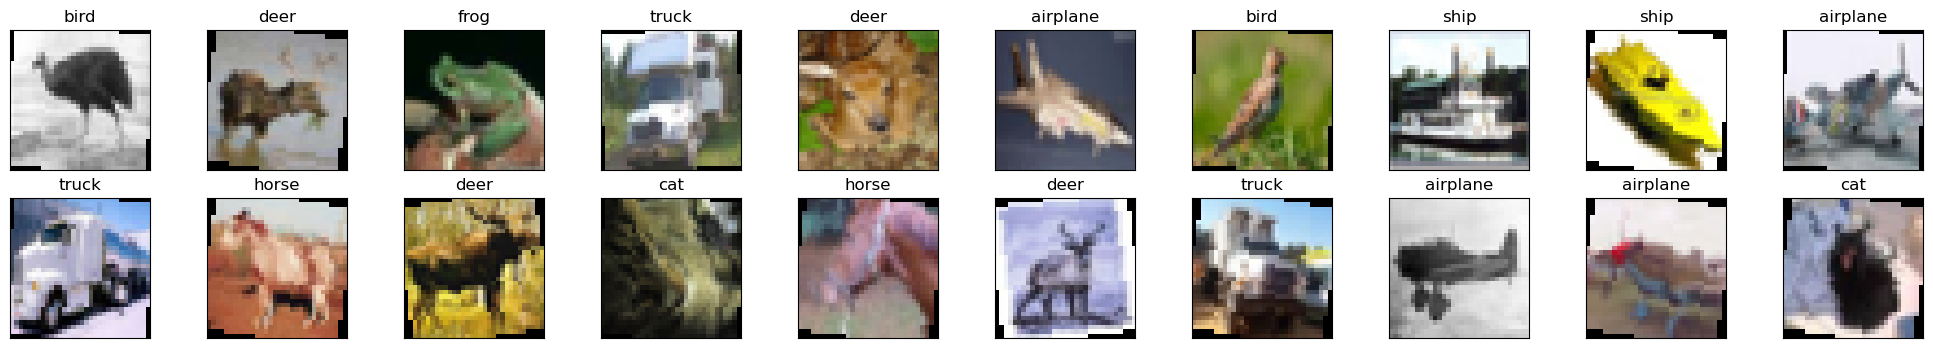

In [12]:
# obtain one batch of training images
dataiter = iter(train_loader)
#images, labels = dataiter.next()
#trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
images, labels = next(iter(train_loader))
images = images.numpy() # convert images to numpy for display
images.shape # (number of examples: 20, number of channels: 3, pixel sizes: 32x32)


# plot the images in the batch, along with the corresponding labels
# creating a figure with multiple subplots arranged in a 2x10 grid. 
fig = plt.figure(figsize=(25, 4))
# display 20 images
# method takes three arguments:
#   First argument: 2 - This specifies the number of rows in the subplot grid.
#   Second argument: 20/2 - This evaluates to 10, specifying the number of columns in the subplot grid.
#   Third argument: idx+1 - This determines the index of the current subplot 
for idx in np.arange(20):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(classes[labels[idx]])
    
# BELOW "images.shape" = #number of examples: 20, number of channels: 3, pixel sizes: 32x32) 

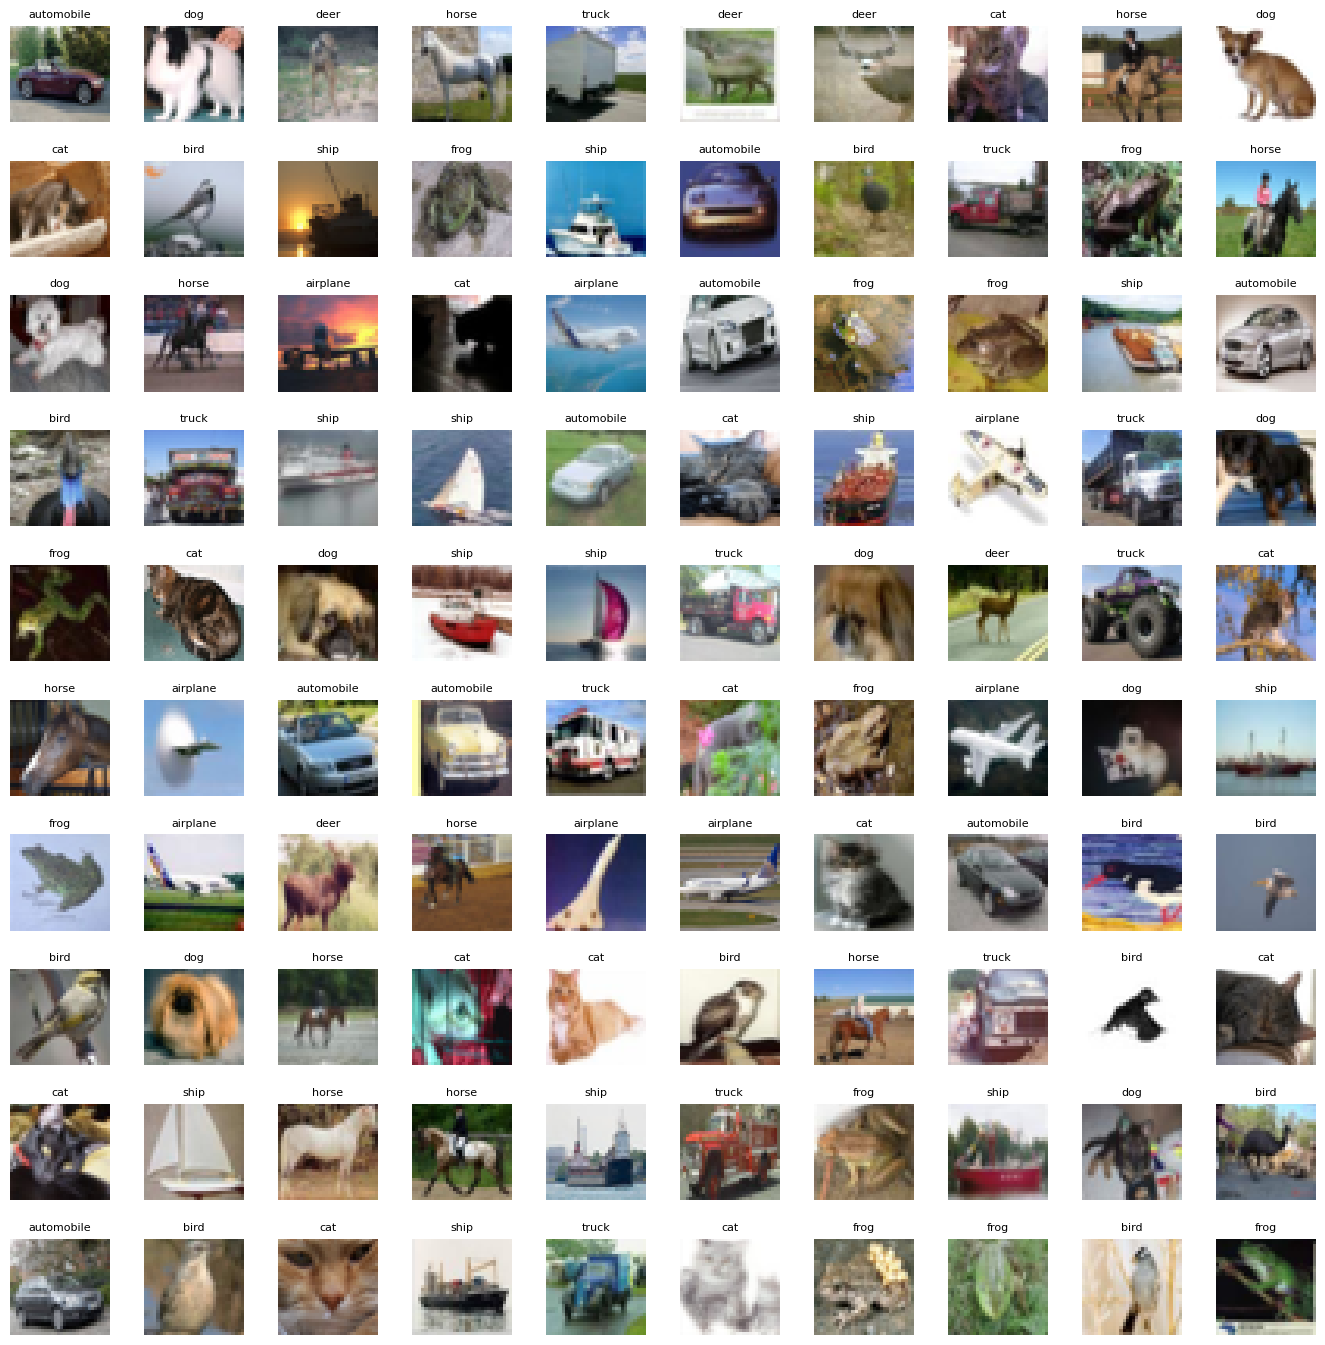

In [13]:
# Define the labels of the dataset
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']

# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 10
L_grid = 10

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_train = len(X_train) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index    
    axes[i].imshow(X_train[index,1:])
    label_index = int(y_train[index])
    axes[i].set_title(labels[label_index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

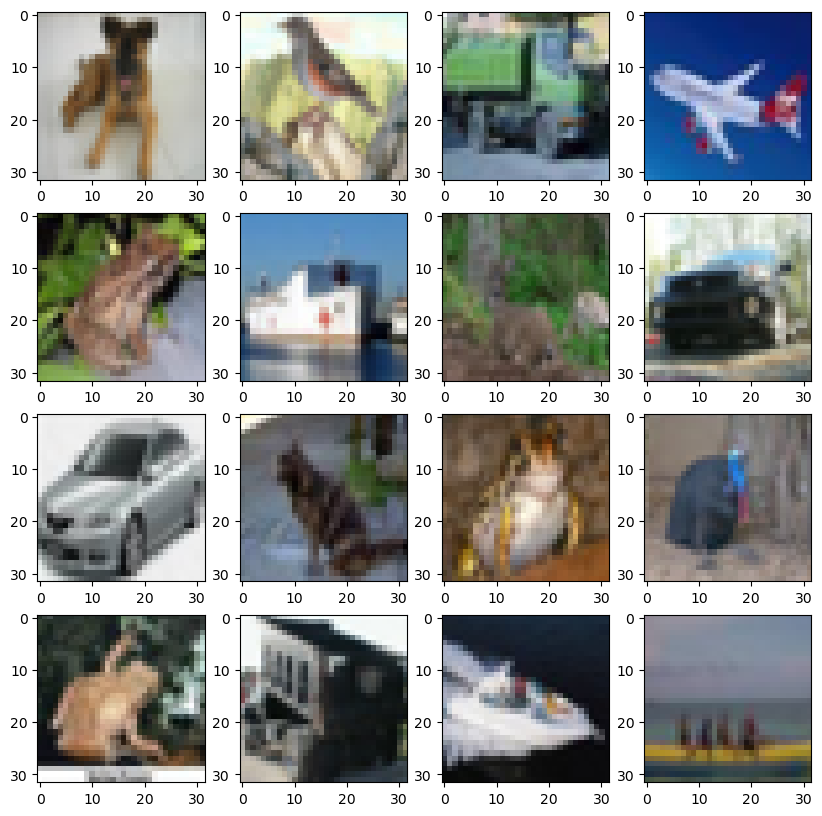

In [14]:
#random
# Show randomly 16 images in the CIFAR-100
plt.figure(figsize=(10, 10))
for i in range (16):
  rand_num = np.random.randint(0, 5000)
  cifar_img = plt.subplot(4,4, i+1)
  plt.imshow(X_train[rand_num])

### View an Image in More Detail

Here, we look at the normalized red, green, and blue (RGB) color channels as three separate, grayscale intensity images.

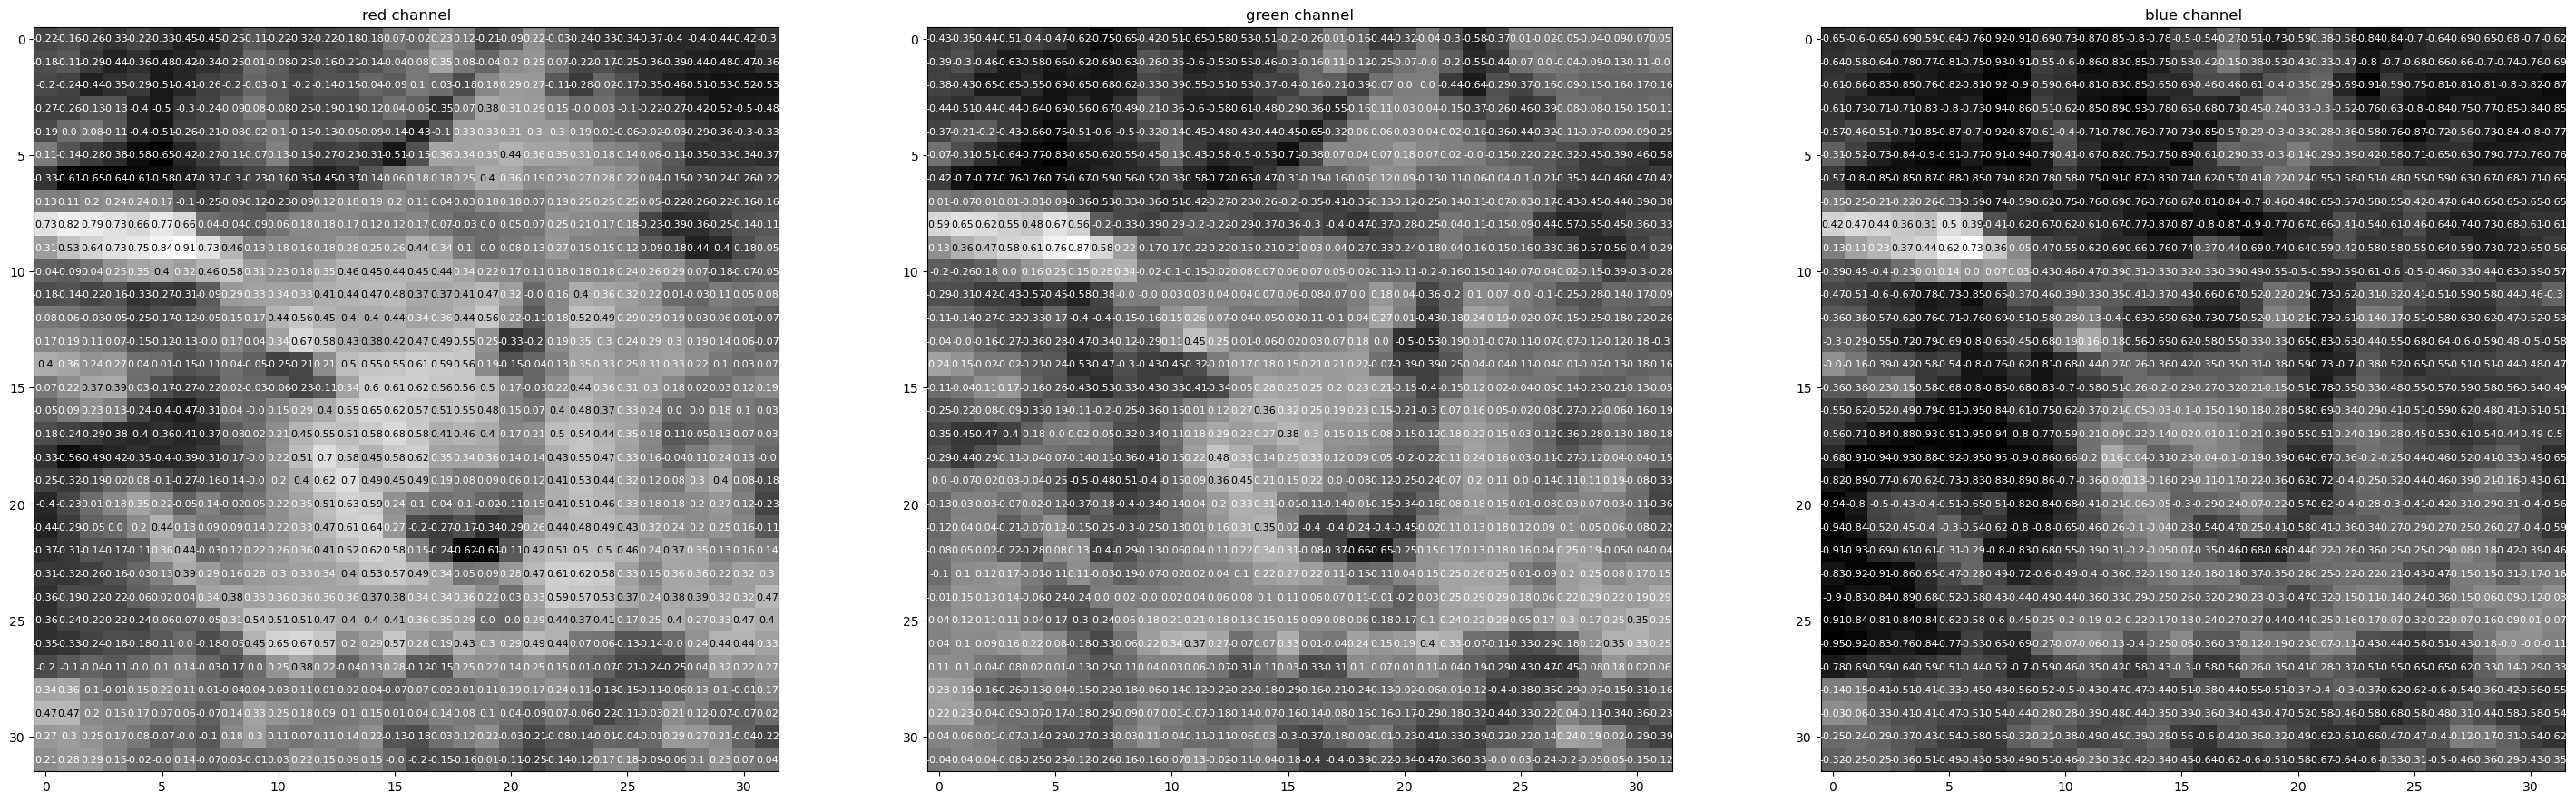

In [15]:
# Select the 5th element (index 4) an image from a collection of images (the 4th one in this case)
# np.squeeze() to remove any unnecessary dimensions from the image array.
# The result is a 3D array representing an RGB image, where:
# The first two dimensions represent the height and width of the image
# The third dimension represents the color channels (Red, Green, Blue)


rgb_img = np.squeeze(images[4])#6 car, 4 is plane
channels = ['red channel', 'green channel', 'blue channel']

fig = plt.figure(figsize = (36, 36)) 
for idx in np.arange(rgb_img.shape[0]):
    ax = fig.add_subplot(1, 3, idx + 1)
    img = rgb_img[idx]
    ax.imshow(img, cmap='gray')
    ax.set_title(channels[idx])
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            val = round(img[x][y],2) if img[x][y] !=0 else 0
            ax.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center', size=8,
                    color='white' if img[x][y]<thresh else 'black')

### Most CNNs ctually use cross-correlation rather than true convolution, even though they are called "convolutional" networks.
<img style="float: right; padding-right: 10px; width: 500px" src="images/cnn-slide-matrix.jpg" alt="cnn-slide-matrix.jpg"/>
The main difference is:

    Convolution involves flipping the kernel both horizontally and vertically before sliding it over the input.
    Cross-correlation skips this flipping step and uses the kernel as-is.

Mathematically, convolution is defined with a negative sign in the indexing, while cross-correlation uses positive indexing. This reflects the kernel flipping. Cross-correlation is more computationally efficient since it avoids the flipping step. 

Conv2D - A 2D convolutional layer, essential for image processing tasks, applies sliding filters over the input to detect features like edges, textures, eyes, nose, background tree, etc.



---
## Define the Network [Architecture](http://pytorch.org/docs/stable/nn.html)

This time, you'll define a CNN architecture. Instead of an MLP, which used linear, fully-connected layers, you'll use the following:
* [Convolutional layers](https://pytorch.org/docs/stable/nn.html#convolution-layers), which can be thought of as stack of filtered images.
* [Maxpooling layers](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html#torch.nn.MaxPool2d), which reduce the x-y size of an input, keeping only the most _active_ pixels from the previous layer.
* The usual Linear + Dropout layers to avoid overfitting and produce a 10-dim output.

#### Define a model with multiple convolutional layers and the feedforward metwork behavior

The more convolutional layers you include, the more complex patterns in color and shape a model can detect. It's suggested that your final model include 2 or 3 convolutional layers as well as linear layers + dropout in between to avoid overfitting. 

It's good practice to look at existing research and implementations of related models as a starting point for defining your own models. You may find it useful to look at [this PyTorch classification example](https://github.com/pytorch/tutorials/blob/master/beginner_source/blitz/cifar10_tutorial.py) or [this Keras example](https://keras.io/examples/vision/mnist_convnet/) to help decide on a final structure.

#### Output volume for a convolutional layer

To compute the output size of a given convolutional layer we can perform the following calculation (taken from [Stanford's cs231n course](http://cs231n.github.io/convolutional-networks/#layers)):
> We can compute the spatial size of the output volume as a function of the input volume size (W), the kernel/filter size (F), the stride with which they are applied (S), and the amount of zero padding used (P) on the border. The correct formula for calculating how many neurons define the output_W is given by `(W−F+2P)/S+1`. 

For example for a 7x7 input and a 3x3 filter with stride 1 and pad 0 we would get a 5x5 output. With stride 2 we would get a 3x3 output.

In [16]:
# define the CNN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # convolutional layer (sees 32x32x3 image tensor)
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        # convolutional layer (sees 16x16x16 tensor)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        # convolutional layer (sees 8x8x32 tensor)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        # max pooling layer
        self.pool = nn.MaxPool2d(2, 2)
        # linear layer (64 * 4 * 4 -> 500)
        self.fc1 = nn.Linear(64 * 4 * 4, 500)
        # linear layer (500 -> 10)
        self.fc2 = nn.Linear(500, 10)
        # dropout layer (p=0.25)
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        # add sequence of convolutional and max pooling layers
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        # flatten image input
        x = x.view(-1, 64 * 4 * 4)
        # add dropout layer
        x = self.dropout(x)
        # add 1st hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        # add dropout layer
        x = self.dropout(x)
        # add 2nd hidden layer, with relu activation function
        x = self.fc2(x)
        return x

In [17]:
# create a complete CNN
model = Net()
model

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1024, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
)

## ABOVE OUTPUT Represents CNN Architecture

### Convolutional Layers
1. `conv1`: Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   - Input channels: 3 (likely for RGB images)
   - Output channels: 16
   - Kernel size: 3x3
   - Stride: 1
   - Padding: 1 (same padding)

2. `conv2`: Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   - Input channels: 16
   - Output channels: 32
   - Kernel size: 3x3
   - Stride: 1
   - Padding: 1

3. `conv3`: Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   - Input channels: 32
   - Output channels: 64
   - Kernel size: 3x3
   - Stride: 1
   - Padding: 1

### Pooling Layer
`pool`: MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
- Max pooling with 2x2 kernel and stride 2
- This layer is likely applied after each convolutional layer

### Fully Connected Layers
1. `fc1`: Linear(in_features=1024, out_features=500, bias=True)
   - Input features: 1024
   - Output features: 500

2. `fc2`: Linear(in_features=500, out_features=10, bias=True)
   - Input features: 500
   - Output features: 10 (likely for 10-class classification)

### Dropout Layer
`dropout`: Dropout(p=0.25, inplace=False)
- Dropout with 25% probability
- Used for regularization to prevent overfitting

## Network Flow
1. The input (likely an image) passes through three convolutional layers, each followed by a max pooling operation.
2. The output is then flattened and fed into two fully connected layers.
3. Dropout is applied, probably between the fully connected layers or after them.
4. The final output has 10 features, suggesting this network is designed for a 10-class classification task.

This architecture is suitable for image classification tasks, such as classifying handwritten digits (MNIST) or simple object recognition tasks.

In [18]:
# move tensors to GPU if CUDA is available
if train_on_gpu:
    model.cuda()

### Specify [Loss Function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [Optimizer](http://pytorch.org/docs/stable/optim.html)

Decide on a loss and optimization function that is best suited for this classification task. The linked code examples from above, may be a good starting point; [this PyTorch classification example](https://github.com/pytorch/tutorials/blob/master/beginner_source/blitz/cifar10_tutorial.py) or [this, more complex Keras example](https://onlytojay.medium.com/mnist-cnn-optimizer-comparison-with-tensorflow-keras-163735862ecd). Pay close attention to the value for **learning rate** as this value determines how your model converges to a small error.

#### Define the loss and optimizer and see how these choices change the loss over time
The `nn.CrossEntropyLoss()` is a commonly used loss function in PyTorch for training classification models. Here are the key points about this criterion:

## CrossEntropyLoss combines two operations:

1. Applies a log softmax function to the input logits
2. Computes the negative log-likelihood loss

By using CrossEntropyLoss, you simplify your model architecture and loss computation while maintaining numerical stability in your training process. This makes it particularly useful for multi-class classification problems.
 
## Input and Target

- **Input**: The criterion expects unnormalized logits as input, typically the raw output from the last linear layer of your neural network. The shape should be (batch_size, num_classes) for unbatched input[1].

- **Target**: It can accept two types of targets:
  - Class indices: Integer values in the range [0, num_classes - 1]
  - Class probabilities: A tensor of the same shape as the input, with values between 0 and 1

## Key Features

- **Automatic normalization**: It internally applies softmax to the input, so you don't need to add a softmax layer to your model

- **Numerical stability**: By combining log softmax and NLL loss, it provides better numerical stability compared to using them separately

- **Weighting**: You can optionally provide a weight parameter to assign different weights to classes, which is useful for imbalanced datasets

## Usage Example

```python
criterion = nn.CrossEntropyLoss()
outputs = model(inputs)  # shape: (batch_size, num_classes)
labels = torch.LongTensor([...])  # shape: (batch_size,)
loss = criterion(outputs, labels)
loss.backward()
```

Remember that the target (labels) should be of type `torch.LongTensor` when using class indices[3]. If you're using floating-point labels, you'll need to convert them:

```python
labels = labels.long()
```
## SGD: Stochastic Gradient Descent Optimizer

 **optim.SGD():** In code below, creates an instance of the **Stochastic Gradient Descent (SGD)** optimizer from PyTorch's optim module.

model.parameters(): This method returns an iterator over all the parameters of the model. It's used to specify which parameters the optimizer should update.  lr=0.01: This sets the learning rate for the optimizer to 0.01

Learning Rate: The lr parameter (0.01 in this case) determines the step size at each iteration while moving toward a minimum of the loss function. A smaller learning rate may lead to more precise convergence but will take longer, while a larger one may converge faster but risk overshooting the minimum.

Model Parameters: By passing model.parameters(), you're telling the optimizer which parameters it should update during the optimization process.Key Points
    

In [19]:
# specify loss function (categorical cross-entropy)
criterion = nn.CrossEntropyLoss()

# specify optimizer
optimizer = optim.SGD(model.parameters(), lr=0.01)

---
## Train the Network

Remember to look at how the training and validation loss decreases over time; if the validation loss ever increases it indicates possible overfitting. (In fact, in the below example, we could have stopped around epoch 33 or so!)

In [20]:
# number of epochs to train the model
n_epochs = 30

valid_loss_min = np.Inf # track change in validation loss

for epoch in range(1, n_epochs+1):

    # keep track of training and validation loss
    train_loss = 0.0
    valid_loss = 0.0
    
    ###################
    # train the model #
    ###################
    model.train()
    for data, target in train_loader:
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update training loss
        train_loss += loss.item()*data.size(0)
        
    ######################    
    # validate the model #
    ######################
    model.eval()
    for data, target in valid_loader:
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # update average validation loss 
        valid_loss += loss.item()*data.size(0)
    
    # calculate average losses
    train_loss = train_loss/len(train_loader.sampler)
    valid_loss = valid_loss/len(valid_loader.sampler)
        
    # print training/validation statistics 
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch, train_loss, valid_loss))
    
    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(model.state_dict(), 'model_cifar.pt')
        valid_loss_min = valid_loss

Epoch: 1 	Training Loss: 2.118712 	Validation Loss: 1.841515
Validation loss decreased (inf --> 1.841515).  Saving model ...
Epoch: 2 	Training Loss: 1.686509 	Validation Loss: 1.553315
Validation loss decreased (1.841515 --> 1.553315).  Saving model ...
Epoch: 3 	Training Loss: 1.515973 	Validation Loss: 1.491196
Validation loss decreased (1.553315 --> 1.491196).  Saving model ...
Epoch: 4 	Training Loss: 1.409607 	Validation Loss: 1.330644
Validation loss decreased (1.491196 --> 1.330644).  Saving model ...
Epoch: 5 	Training Loss: 1.322404 	Validation Loss: 1.321201
Validation loss decreased (1.330644 --> 1.321201).  Saving model ...
Epoch: 6 	Training Loss: 1.248422 	Validation Loss: 1.185790
Validation loss decreased (1.321201 --> 1.185790).  Saving model ...
Epoch: 7 	Training Loss: 1.182976 	Validation Loss: 1.153393
Validation loss decreased (1.185790 --> 1.153393).  Saving model ...
Epoch: 8 	Training Loss: 1.133891 	Validation Loss: 1.107666
Validation loss decreased (1.15339

###  Load the Model with the Lowest Validation Loss

In [21]:
model.load_state_dict(torch.load('model_cifar.pt'))

<All keys matched successfully>

---
## Test the Trained Network

Test your trained model on previously unseen data! A "good" result will be a CNN that gets around 70% (or more, try your best!) accuracy on these test images.

In [22]:
# track test loss
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval()
# iterate over test data
for data, target in test_loader:
    # move tensors to GPU if CUDA is available
    if train_on_gpu:
        data, target = data.cuda(), target.cuda()
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the batch loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)    
    # compare predictions to true label
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    # calculate test accuracy for each object class
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# average test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            classes[i], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.657289

Test Accuracy of airplane: 83% (837/1000)
Test Accuracy of automobile: 86% (866/1000)
Test Accuracy of  bird: 65% (656/1000)
Test Accuracy of   cat: 59% (590/1000)
Test Accuracy of  deer: 78% (785/1000)
Test Accuracy of   dog: 62% (629/1000)
Test Accuracy of  frog: 82% (821/1000)
Test Accuracy of horse: 82% (826/1000)
Test Accuracy of  ship: 87% (879/1000)
Test Accuracy of truck: 85% (855/1000)

Test Accuracy (Overall): 77% (7744/10000)


### Question: What are the model's weaknesses and how might they be improved?

**Answer**: This model seems to do best on vehicles rather than animals. For example, it does best on the automobile class, 90% and worst on the cat class, 58%. I suspect it's because animals vary in color and size and so it would improve this model to increase the number of animal images in the first place or perhaps add another convolutional layer to detect finer patterns in these images. 

You also might experiment with a smaller learning rate so that the model takes small steps in the right direction as it is training, as mentioned in Lecture.

### Visualize Sample Test Results

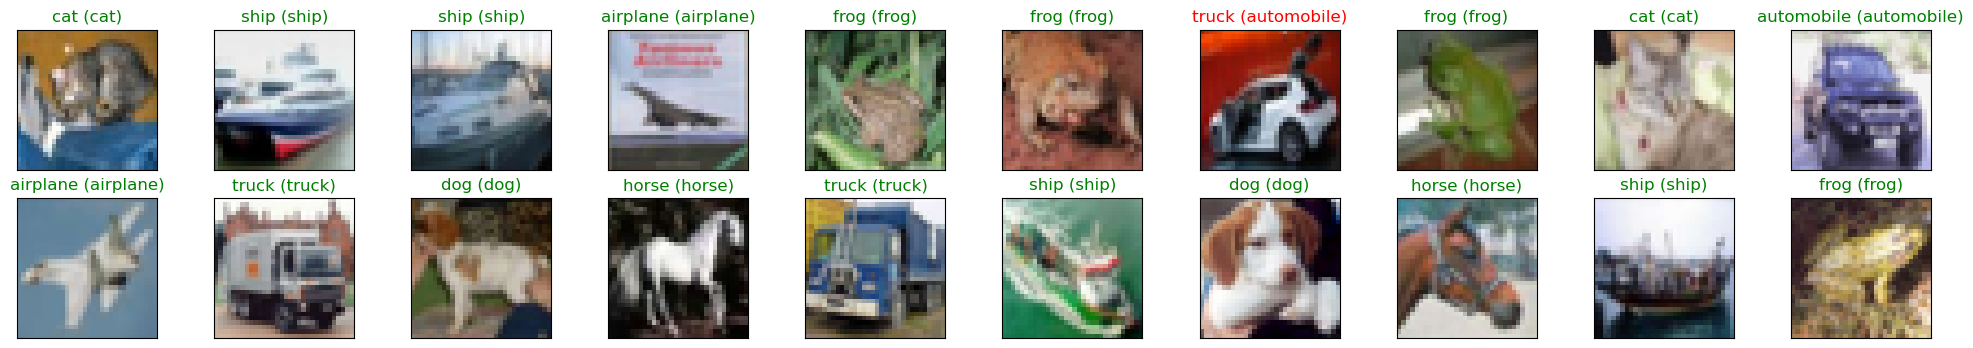

In [23]:
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = next(dataiter)

# move model inputs to cuda, if GPU available
if train_on_gpu:
    images = images.cuda()

# get sample outputs
output = model(images)
# convert output probabilities to predicted class
_, preds_tensor = torch.max(output, 1)
# prep images for display
preds = np.squeeze(preds_tensor.numpy()) if not train_on_gpu else np.squeeze(preds_tensor.cpu().numpy())

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    imshow(images[idx] if not train_on_gpu else images[idx].cpu())
    ax.set_title("{} ({})".format(classes[preds[idx]], classes[labels[idx]]),
                 color=("green" if preds[idx]==labels[idx].item() else "red"))